In [1]:
import pandas as pd

In [2]:
# Load the datasets
stores_data = pd.read_csv("C:\\Users\\JioInstitute\\Downloads\\stores_data_updated.csv")
sales_data = pd.read_csv("C:\\Users\\JioInstitute\\Downloads\\sales.csv")
promotions_data = pd.read_csv("C:\\Users\\JioInstitute\\Downloads\\promotions.csv")

In [3]:
# Convert date columns to datetime
stores_data['OPEN_DATE'] = pd.to_datetime(stores_data['OPEN_DATE'], errors='coerce')
stores_data['CLOSE_DATE'] = pd.to_datetime(stores_data['CLOSE_DATE'], errors='coerce')

In [4]:
# Replace 'Dec 31, 1999' placeholder with NaT (Not a Time)
placeholder_date = pd.Timestamp('1999-12-31')
stores_data.loc[stores_data['OPEN_DATE'] == placeholder_date, 'OPEN_DATE'] = pd.NaT
stores_data.loc[stores_data['CLOSE_DATE'] == placeholder_date, 'CLOSE_DATE'] = pd.NaT

In [5]:
# Drop rows where OPEN_DATE is NaT (stores not yet open)
stores_data_clean = stores_data.dropna(subset=['OPEN_DATE'])

In [6]:
# Display cleaned stores data
print("Cleaned Stores Data:")
print(stores_data_clean.head())

Cleaned Stores Data:
   STORE_KEY  STORE_NUMBER   ROW_EFFECTIVE_TIMESTAMP  \
0         14          1704  2024-01-30T02:06:54.251Z   
1        824             1  2024-01-30T02:06:54.251Z   
2        862            39  2024-01-30T02:06:54.251Z   
3        880            57  2024-01-30T02:06:54.251Z   
4         21          1712  2024-01-30T02:06:54.251Z   

   ROW_EXPIRATION_TIMESTAMP STORE_NAME STORE_TYPE_CODE STORE_TYPE_NAME  \
0  2024-01-30T02:06:54.251Z     IL1704            Fran       Franchise   
1  2024-01-30T02:06:54.251Z        TX1            Fran       Franchise   
2  2024-01-30T02:06:54.251Z       IL39            Fran       Franchise   
3  2024-01-30T02:06:54.251Z       IL57            Fran       Franchise   
4  2024-01-30T02:06:54.251Z     OH1712            Fran       Franchise   

   OPEN_DATE CLOSE_DATE         CITY_NAME  ... GLOBAL_REGION_NAME  \
0 2020-06-20 2100-12-12           CHICAGO  ...           Domestic   
1 1998-04-14 2100-12-12  HIGHLAND VILLAGE  ...           Do

In [7]:
# Merge sales data with cleaned stores data on STORE_NUMBER
sales_stores_merged = pd.merge(sales_data, stores_data_clean[['STORE_NUMBER']], on='STORE_NUMBER', how='inner')

In [8]:
# Display merged sales data
print("Filtered Sales Data:")
print(sales_stores_merged.head())

Filtered Sales Data:
   STORE_KEY  STORE_NUMBER   OPEN_DATE  BUSINESS_DATE_KEY BUSINESS_DATE  \
0       2104          1323  11/21/2017           20221008     10/8/2022   
1       2104          1323  11/21/2017           20221210    12/10/2022   
2       2104          1323  11/21/2017           20230106      1/6/2023   
3       2104          1323  11/21/2017           20220904      9/4/2022   
4       2104          1323  11/21/2017           20230322     3/22/2023   

   TEMP_CLOSE_INDICATOR  PROJECTION_INCLUDED_INDICATOR  \
0                   0.0                              0   
1                   0.0                              0   
2                   0.0                              0   
3                   0.0                              0   
4                   0.0                              0   

   BUSINESS_DATE_FISCAL_DAY_OF_YEAR  BUSINESS_DATE_FISCAL_YEAR  \
0                               287                       2022   
1                               350            

In [9]:
sales_stores_merged.shape

(364204, 15)

In [10]:
# Convert date columns to datetime
stores_data['OPEN_DATE'] = pd.to_datetime(stores_data['OPEN_DATE'], errors='coerce')
stores_data['CLOSE_DATE'] = pd.to_datetime(stores_data['CLOSE_DATE'], errors='coerce')
sales_data['BUSINESS_DATE'] = pd.to_datetime(sales_data['BUSINESS_DATE'], errors='coerce')
promotions_data['PROMOTION_START_DATE'] = pd.to_datetime(promotions_data['PROMOTION_START_DATE'], errors='coerce')
promotions_data['PROMOTION_END_DATE'] = pd.to_datetime(promotions_data['PROMOTION_END_DATE'], errors='coerce')

In [11]:
#eplace 'Dec 31, 1999' placeholder with NaT (Not a Time)
placeholder_date = pd.Timestamp('1999-12-31')
stores_data.loc[stores_data['OPEN_DATE'] == placeholder_date, 'OPEN_DATE'] = pd.NaT
stores_data.loc[stores_data['CLOSE_DATE'] == placeholder_date, 'CLOSE_DATE'] = pd.NaT

In [12]:
# Drop rows where OPEN_DATE is NaT (stores not yet open)
stores_data_clean = stores_data.dropna(subset=['OPEN_DATE'])

In [13]:
# Merge sales data with cleaned stores data on STORE_NUMBER
sales_stores_merged = pd.merge(sales_data, stores_data_clean[['STORE_NUMBER']], on='STORE_NUMBER', how='inner')

In [14]:
sales_stores_merged.shape

(364204, 15)

In [15]:
# Add a flag for promotion activity
sales_stores_merged['PROMOTION_ACTIVE'] = 0

In [16]:
# Function to merge sales and store data with promotions data and add promotion flags
def merge_promotions_with_flags(sales_stores_df, promo_df):
    for idx, promo in promo_df.iterrows():
        start_date = promo['PROMOTION_START_DATE']
        end_date = promo['PROMOTION_END_DATE']

        # Apply promotions to the sales data that falls within the promotion date range
        mask = (sales_stores_df['BUSINESS_DATE'] >= start_date) & (sales_stores_df['BUSINESS_DATE'] <= end_date)
        sales_stores_df.loc[mask, 'PROMOTION_ACTIVE'] = 1

        # Add promotion details to the filtered sales_stores data
        for col in promo_df.columns:
            if col not in sales_stores_df.columns:
                sales_stores_df[col] = None
            sales_stores_df.loc[mask, col] = promo[col]

    return sales_stores_df

In [17]:
# Apply merging function
final_merged_data = merge_promotions_with_flags(sales_stores_merged, promotions_data)

In [18]:
# Display the final merged data with promotion flags
print("Final Merged Data with Promotions and Flags:")
print(final_merged_data.head())

Final Merged Data with Promotions and Flags:
   STORE_KEY  STORE_NUMBER   OPEN_DATE  BUSINESS_DATE_KEY BUSINESS_DATE  \
0       2104          1323  11/21/2017           20221008    2022-10-08   
1       2104          1323  11/21/2017           20221210    2022-12-10   
2       2104          1323  11/21/2017           20230106    2023-01-06   
3       2104          1323  11/21/2017           20220904    2022-09-04   
4       2104          1323  11/21/2017           20230322    2023-03-22   

   TEMP_CLOSE_INDICATOR  PROJECTION_INCLUDED_INDICATOR  \
0                   0.0                              0   
1                   0.0                              0   
2                   0.0                              0   
3                   0.0                              0   
4                   0.0                              0   

   BUSINESS_DATE_FISCAL_DAY_OF_YEAR  BUSINESS_DATE_FISCAL_YEAR  \
0                               287                       2022   
1                      

In [19]:
final_merged_data.shape

(364204, 29)

In [20]:
final_merged_data.head()

,STORE_KEY,STORE_NUMBER,OPEN_DATE,BUSINESS_DATE_KEY,BUSINESS_DATE,TEMP_CLOSE_INDICATOR,PROJECTION_INCLUDED_INDICATOR,BUSINESS_DATE_FISCAL_DAY_OF_YEAR,BUSINESS_DATE_FISCAL_YEAR,COMP_BUSINESS_DATE_FISCAL_YEAR,...,PROMOTION_OFFER,PROMOTION_ITEM,PROMOTION_CASH_AMOUNT,PROMOTION_PERCENTAGE,PLATFORM,FREQUENCY,PROMOTION_DAY_OF_WEEK,PROMOTION_CHANNEL,PROMOTION_COVERAGE,REGIONAL_COVERAGE
0,2104,1323,11/21/2017,20221008,2022-10-08,0.0,0,287,2022,2021,...,None,None,None,None,None,None,None,None,None,None
1,2104,1323,11/21/2017,20221210,2022-12-10,0.0,0,350,2022,2021,...,None,None,None,None,None,None,None,None,None,None
2,2104,1323,11/21/2017,20230106,2023-01-06,0.0,0,6,2023,2022,...,None,None,None,None,None,None,None,None,None,None
3,2104,1323,11/21/2017,20220904,2022-09-04,0.0,0,253,2022,2021,...,None,None,None,None,None,None,None,None,None,None
4,2104,1323,11/21/2017,20230322,2023-03-22,0.0,0,81,2023,2022,...,None,None,None,None,None,None,None,None,None,None


In [21]:
final_merged_data.shape

(364204, 29)

In [22]:
# Reset the index and drop the old index
final_merged_data_clean = final_merged_data.reset_index(drop=True)

In [23]:
final_merged_data_clean.head()

,STORE_KEY,STORE_NUMBER,OPEN_DATE,BUSINESS_DATE_KEY,BUSINESS_DATE,TEMP_CLOSE_INDICATOR,PROJECTION_INCLUDED_INDICATOR,BUSINESS_DATE_FISCAL_DAY_OF_YEAR,BUSINESS_DATE_FISCAL_YEAR,COMP_BUSINESS_DATE_FISCAL_YEAR,...,PROMOTION_OFFER,PROMOTION_ITEM,PROMOTION_CASH_AMOUNT,PROMOTION_PERCENTAGE,PLATFORM,FREQUENCY,PROMOTION_DAY_OF_WEEK,PROMOTION_CHANNEL,PROMOTION_COVERAGE,REGIONAL_COVERAGE
0,2104,1323,11/21/2017,20221008,2022-10-08,0.0,0,287,2022,2021,...,None,None,None,None,None,None,None,None,None,None
1,2104,1323,11/21/2017,20221210,2022-12-10,0.0,0,350,2022,2021,...,None,None,None,None,None,None,None,None,None,None
2,2104,1323,11/21/2017,20230106,2023-01-06,0.0,0,6,2023,2022,...,None,None,None,None,None,None,None,None,None,None
3,2104,1323,11/21/2017,20220904,2022-09-04,0.0,0,253,2022,2021,...,None,None,None,None,None,None,None,None,None,None
4,2104,1323,11/21/2017,20230322,2023-03-22,0.0,0,81,2023,2022,...,None,None,None,None,None,None,None,None,None,None


In [24]:
final_merged_data_clean.shape

(364204, 29)

In [25]:
!pip install lazypredict


In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier, LazyRegressor

# Load your dataset
df = final_merged_data_clean.sample(n=36000, random_state=42) # Adjust path accordingly

# Convert date fields to datetime type if not already
df['OPEN_DATE'] = pd.to_datetime(df['OPEN_DATE'])
df['BUSINESS_DATE'] = pd.to_datetime(df['BUSINESS_DATE'])

# Handling missing values
# Assuming 'None' values are strings, replace them with numpy's nan
df.replace('None', np.nan, inplace=True)

# Drop columns with too many missing values or fill missing values
df.dropna(axis=1, how='all', inplace=True)  # Drop columns where all values are nan

# Calculate the mean only for numeric columns
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Encode categorical variables using one-hot encoding
df = pd.get_dummies(df, drop_first=True)

# Splitting the dataset into training and testing sets
X = df.drop('NET_SALES_FINAL_USD_AMOUNT', axis=1)  # Feature matrix
y = df['NET_SALES_FINAL_USD_AMOUNT']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Using LazyPredict to find the best model
# Choose LazyRegressor or LazyClassifier based on your target variable type
reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

print(models)

100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [08:45<00:00, 12.51s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000878 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1782
[LightGBM] [Info] Number of data points in the train set: 28800, number of used features: 12
[LightGBM] [Info] Start training from score 4390.826015
                               Adjusted R-Squared           R-Squared  \
Model                                                                   
XGBRegressor                                 0.97                0.97   
LGBMRegressor                                0.96                0.96   
HistGradientBoostingRegressor                0.96                0.96   
RandomForestRegressor                        0.95                0.95   
ExtraTreesRegressor                          0.95                0.95   
MLPRegressor                                 0.95                0.95   
Bagging

In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, median_absolute_error

# Assuming final_merged_data_clean is loaded and preprocessed as in your previous steps
df = final_merged_data_clean.sample(n=36000, random_state=10)

# Convert necessary columns to datetime and handle other preprocessing
df['OPEN_DATE'] = pd.to_datetime(df['OPEN_DATE'])
df['BUSINESS_DATE'] = pd.to_datetime(df['BUSINESS_DATE'])
# Extract year, month, day from datetime columns
df['OPEN_DATE_YEAR'] = df['OPEN_DATE'].dt.year
df['OPEN_DATE_MONTH'] = df['OPEN_DATE'].dt.month
df['OPEN_DATE_DAY'] = df['OPEN_DATE'].dt.day

df['BUSINESS_DATE_YEAR'] = df['BUSINESS_DATE'].dt.year
df['BUSINESS_DATE_MONTH'] = df['BUSINESS_DATE'].dt.month
df['BUSINESS_DATE_DAY'] = df['BUSINESS_DATE'].dt.day

# Drop the original datetime columns as they are now redundant
df.drop(['OPEN_DATE', 'BUSINESS_DATE'], axis=1, inplace=True)
df.replace('None', np.nan, inplace=True)
df.dropna(axis=1, how='all', inplace=True)

# Fill numeric missing values with mean
numeric_cols = df.select_dtypes(include=['number']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# One-hot encode categorical variables
df = pd.get_dummies(df, drop_first=True)

# Split data into features and target
X = df.drop(['NET_SALES_FINAL_USD_AMOUNT'], axis=1)
y = df['NET_SALES_FINAL_USD_AMOUNT']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the XGBRegressor with optimal parameters
xgb_model = XGBRegressor(
    colsample_bytree=0.3, 
    learning_rate=0.1, 
    max_depth=5, 
    alpha=10, 
    n_estimators=100
)
xgb_model.fit(X_train, y_train)

# Predict on the test set
predictions = xgb_model.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)
adjusted_r2 = 1 - (1-r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
median_ae = median_absolute_error(y_test, predictions)

# Display results
results = {
    '% Error': f"{(mae / y_test.mean()) * 100:.2f}%",
    'Absolute Error': mae,
    'MSE': mse,
    'RMSE': rmse,
    'R²': r2,
    'Adjusted R²': adjusted_r2,
    'Median Absolute Error': median_ae
}
print(results)

{'% Error': '8.57%', 'Absolute Error': 376.9835957260238, 'MSE': 282768.2510475592, 'RMSE': 531.7595801182704, 'R²': 0.9468555502814364, 'Adjusted R²': 0.9464763719188669, 'Median Absolute Error': 279.8396875000001}


In [43]:
! pip install shap

  Obtaining dependency information for shap from https://files.pythonhosted.org/packages/82/29/923869e92c74bf07ec2b9a52ad5ac67d4184c873ba33ada7d4584356463a/shap-0.46.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for slicer==0.0.8 from https://files.pythonhosted.org/packages/63/81/9ef641ff4e12cbcca30e54e72fb0951a2ba195d0cda0ba4100e532d929db/slicer-0.0.8-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/456.1 kB ? eta -:--:--
   -- ------------------------------------ 30.7/456.1 kB 660.6 kB/s eta 0:00:01
   ------------- -------------------------- 153.6/456.1 kB 1.8 MB/s eta 0:00:01
   ----------------------------------- ---- 409.6/456.1 kB 3.2 MB/s eta 0:00:01
   ---------------------------------------- 456.1/456.1 kB 3.2 MB/s eta 0:00:00


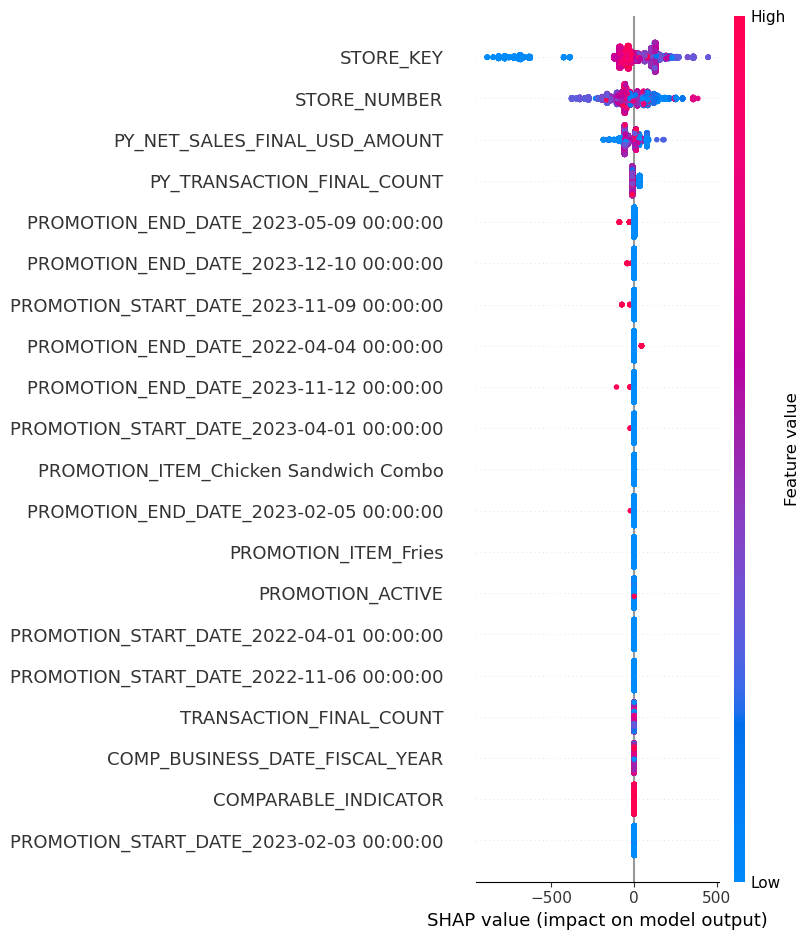

In [46]:
import shap

# Convert all data to float to ensure compatibility with SHAP
X_train = X_train.apply(pd.to_numeric, errors='coerce').fillna(0).astype(float)
X_test = X_test.apply(pd.to_numeric, errors='coerce').fillna(0).astype(float)

# Calculate SHAP values for feature importance
explainer = shap.Explainer(xgb_model, X_train)
shap_values = explainer(X_test)

# Plot the SHAP values
shap.summary_plot(shap_values, X_test)

In [48]:
!pip install flask